# Descriptive Statistics

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- (Skewed) Distribution of Death by Age: https://miro.medium.com/v2/resize:fit:1400/1*jW9Zwvr5pPmVZcdQ72Gtiw.jpeg
- (Normal, Same Mean) Distribution of IQ Scores (Male and Female): https://qph.cf2.quoracdn.net/main-qimg-e3a75fc210c089f8562259e7a91cc646.webp
- (Normal, Diff Mean) Distribution of Heights (Male, Female and NBA Players): https://distributionofthings.com/human-height/

## Statistics and Parameters

Remember, *Descriptive Statistics* summarizes qualities of a group (of people or things) numerically and visually.

Numerical summaries are divided into these main categories:

1. **Proportion** (count)
1. **Measures of Central Tendency** (mean, median, mode)
1. **Measures of Dispersion** (range, variance, standard deviation)
1. **Measures of Shape** (skewness, kurtosis)

These summary numbers are called parameters when we describe a population, and are called statistics when we describe a sample.

**Statistics**: Numerical characteristics that describe a sample, such as the sample mean (x̄) or standard deviation (s). They are used to estimate population parameters based on sample data.

**Parameters**: Numerical characteristics that describe a population, such as the population mean (μ) or standard deviation (σ). These values are typically unknown and are inferred from sample statistics.

In essence, parameters describe populations, while statistics describe samples.

## Proportion

**Proportion** ($\hat p$): is a fraction of the sample that has a certain characteristic. In other words, relative frequency.

Example:

- A university has $10,000$ students.
- $2,000$ of them are international students.
- The proportion of international students is $\frac{2,000}{10,000} = 0.20$ or $20\%$.



In [10]:
total_students = 10000
international_students = 2000
proportion = international_students / total_students
print(f'Proportion of international students: {proportion:.2%}')

Proportion of international students: 20.00%


## Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution. Common measures of central tendency include:

1. **Mode**: the most frequent value
2. **Median**: the middle value
3. **Mean**: the average value

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Visualisation_mode_median_mean.svg/225px-Visualisation_mode_median_mean.svg.png">

Figure shows Mode, Median, and Mean in a skewed distribution

### Mean

Synonomous with the term "average", the **mean**, is calculated by summing up all the values in a dataset and dividing by the total number of values:

$$ \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i $$

In [11]:
data = [10, 8, 12, 15, 10, 9]
mean = sum(data) / len(data)
print(f'Mean: {mean:.2f}')

Mean: 10.67


### Median

The **median** is the midpoint value in the sorted collection of values.

$$
\text{Median} =\begin{cases}\text{the } \left(\frac{n + 1}{2}\right)^{\text{th}} \text{ term, if } n \text{ is odd} \\ \\\text{the average of the } \left(\frac{n}{2}\right)^{\text{th}} \text{ and } \left(\frac{n}{2} + 1\right)^{\text{th}} \text{ terms, if } n \text{ is even}\end{cases}
$$

In [12]:
data = [10, 8, 12, 15, 10, 9]
data.sort()
midpoint = len(data) // 2

if len(data) % 2 == 0: 
    median = (data[midpoint] + data[midpoint - 1]) / 2
else:
    median = data[midpoint]

print(f'Median: {median:.2f}')

Median: 10.00


### Mode

The **mode** is simply the value that occurs most frequently.

In [13]:
data = [10, 8, 12, 15, 10, 9]

frequency_counts = {}
for num in data:
    frequency_counts[num] = frequency_counts.get(num, 0) + 1
mode = max(frequency_counts, key=frequency_counts.get)

print(f'Mode: {mode:.2f}')

Mode: 10.00



- With small sample sizes, the mean typically provides the most accurate measure of central tendency.
- With larger sample sizes, the mean, median, and mode will tend to coincide, as long as the distribution isn't skewed
- Skewed distributions, in contrast, drag the mean away from the center and toward the tail.

## Measures of Dispersion

The most widely-used measures of dispersion of values around the center of a distribution are: 

* Range
* Variance
* Standard deviation
* Standard error

IQR is a relatively rare measure of the dispersion.

### Range

Range is simply `max - min` values.

In [14]:
data = [10, 8, 12, 15, 10, 9]
range_value = max(data) - min(data)
print(f'Range: {range_value}')

Range: 7


### Variance

**Variance** (denoted with $\sigma^2$) is the average squared distance between each point and the mean of the distribution: 
$$ \sigma^2 = \frac{1}{n}\sum_{i=1}^n (x_i-\bar{x})^2 $$

In [19]:
data = [10, 8, 12, 15, 10, 9]
variance = np.var(data) 
print(f'Variance: {variance:.2f}')

Variance: 5.22


Side notes:
- Technically speaking, we should divide by $n$-1 with a sample of data, but with the large datasets typical of machine learning, it's a negligible difference. If $n$ were equal to a small number like 8 then it would matter.
- Also technically speaking, the variance of a sample is typically denoted with $s^2$ as opposed to the Greek $\sigma^2$, akin to how $\bar{x}$ denotes the mean of a sample while the Greek $\mu$ is reserved for population mean.

### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution: 
$$ \sigma = \sqrt{\sigma^2} $$

A standard deviation close to zero indicates that data points are very close to the mean, whereas a larger standard deviation indicates data points are spread further away from the mean.

In [21]:
standard_deviation = np.std(data)
print(f'Standard Deviation: {standard_deviation:.2f}')

Standard Deviation: 2.29


An example of a bell curve distribution (normal / gaussian distribution) would be:

if students in a math class took a final exam, and the class average was 7.5 out of 10 and the standard deviation was 0.5 points. If the class scores follow a normal distribution, then this means that:

- 68% of the students received a score between 7.0 and 8.0 on the test, or the mean (7.5) plus or minus 1 standard deviation (0.5)
- 95% of students received a grade between 6.5 and 8.5 on the exam, or the mean (7.5) plus or minus 2 standard deviations (1.0)
- 99.7% of students received a grade between 6.0 and 9.0, or the mean (7.5) plus or minor 3 standard deviations

In [22]:
# Set the mean and standard deviation of the data.
mu = 7.5
sigma = 0.5

# Generate a NumPy ndarray of 1000 elements with the specified mean and standard deviation.
scores = np.random.normal(loc=mu, scale=sigma, size=1000)

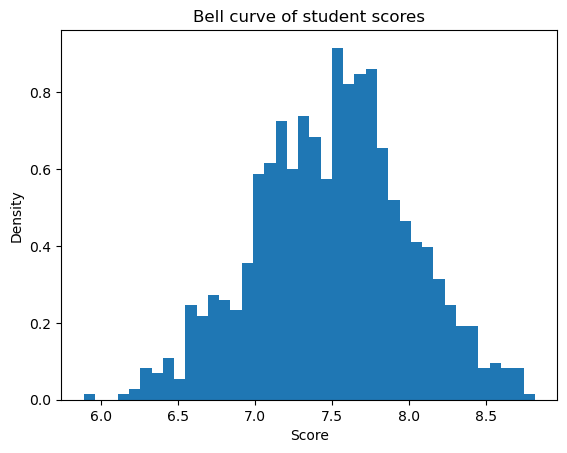

In [23]:
# Plot the bell curve of the data.
plt.hist(scores, bins=40, density=True)
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("Bell curve of student scores")
plt.show()

## Quantiles

Generally speaking, quantiles divide up distributions and the most common are:

1. **Percentiles**: divide up the distribution into 100 equal parts.
1. **Quartiles**: divide up the distribution into 4 equal parts.
1. **Deciles**: divide up the distribution into 10 equal parts.

The median, which divides a distribution in two at its midpoint, is the most well-known example of a quantile:

In [24]:
np.median(x)

0.026373169762551413

In [25]:
np.quantile(x, 0.5)

0.026373169762551413

### Percentiles

**Percentiles** divide the distribution at any point out of one hundred ("pour cent" is French for "out of a hundred"). For example, if we'd like to identify the threshold for the top 5% of a distribution, we'd cut it at the 95th percentile. Or, for the top 1%, we'd cut at the 99th percentile.

In [ ]:
data = np.random.normal(loc=0, scale=1, size=1000)
percentiles = np.percentile(data, [25, 50, 75])
print(f'25th percentile: {percentiles[0]:.2f}')
print(f'50th percentile (median): {percentiles[1]:.2f}')
print(f'75th percentile: {percentiles[2]:.2f}')

25th percentile: -0.65
50th percentile (median): -0.01
75th percentile: 0.65


Anytime that a set of data needs to be broken into digestible chunks, *percentiles* are helpful.

#### Example 1

A student might earn a score of 9/10 on an exam. However, this score is less impressive if it corresponds to the 20th percentile, meaning that: A whole $(100 - 20)\% = 80\%$ of the class earned a score greater than or equal to 9/10

#### Example 2

Percentiles are also used in children's growth charts to compare a child's height or weight to other children of the same age. This allows parents to know if their child's growth is typical or unusual.

Imagine a 4-year-old girl named Lily who is 105 cm tall. Her pediatrician consults a growth chart and finds that Lily's height is at the 75th percentile for her age. This means that: 

- 75% of 4-year-old girls are shorter than Lily (105 cm).
- 25% of 4-year-old girls are taller than Lily.

If Lily's height had been at the 25th percentile at her previous checkup, her doctor would have monitored her growth more closely to ensure she's developing appropriately.

## The Box-and-Whisker Plot

<img src="https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png">

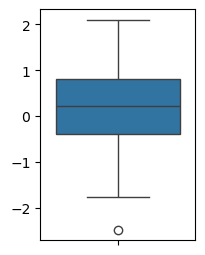

In [40]:
data = np.random.normal(size=100)
plt.figure(figsize=(2, 3))
sns.boxplot(data)
plt.show()

Useful for examining distributions on their own, box-and-whisker plots are especially helpful for comparing distributions:

In [104]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


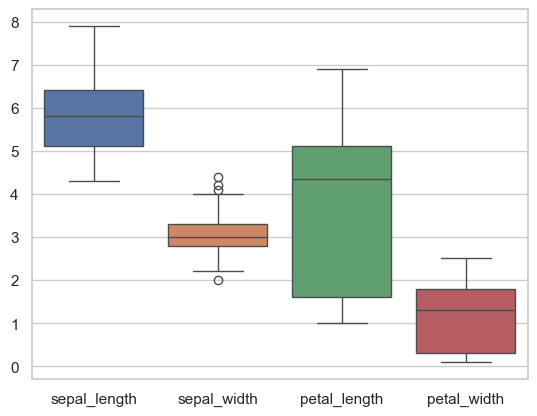

In [105]:
_ = sns.boxplot(data=iris)

In [106]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


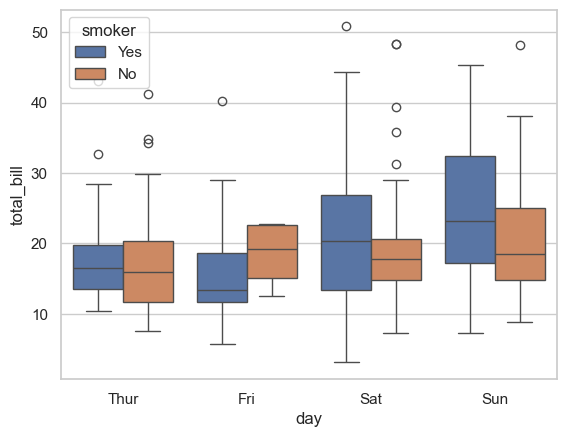

In [107]:
_ = sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)

## Outliers

Note: It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation).

See: [Outliers Notebook](./pandas_tricks/outliers.ipynb).

<img src="https://sp-ao.shortpixel.ai/client/to_auto,q_glossy,ret_img,w_1024,h_1024/https://www.malicksarr.com/wp-content/uploads/2021/11/detect-outliers1-1024x1024.png" height="560">

Source: https://www.malicksarr.com/how-to-detect-and-handle-outliers-in-data-mining/

## Statistical Moments: find out the measures of shape of different distributions

*Statistical Moments* are measures of the shape of a distribution. The first four moments are:

1. **Mean**: The average value of the distribution.
1. **Variance**: The average squared distance from the mean.
1. **Skewness**: The degree of asymmetry in the distribution.
1. **Kurtosis**: The degree of "peakedness" in the distribution.

#### Normal Distribution Moments

In [ ]:
from scipy import stats

# note: moments is composed of letters 'mvsk' defining which moments to compute:
# 'm' = mean
# 'v' = variance
# 's' = (Fisher's) skew
# 'k' = (Fisher's) kurtosis
# (default is moments='mv')
mean, variance, skew, kurtosis = stats.norm.stats(moments="mvsk")
print(f"{mean:.2f} mean")
print(f"{variance:.2f} variance")
print(f"{skew:.2f} skew")
print(f"{kurtosis:.2f} kurtosis")

0.00 mean
1.00 variance
0.00 skew
0.00 kurtosis


#### Exponential Distribution Moments

In [ ]:
from scipy import stats

mean, variance, skew, kurtosis = stats.expon.stats(moments="mvsk")
print(f"{mean:.2f} mean")
print(f"{variance:.2f} variance")
print(f"{skew:.2f} skew")
print(f"{kurtosis:.2f} kurtosis")

1.00 mean
1.00 variance
2.00 skew
6.00 kurtosis
